<a href="https://colab.research.google.com/github/jhuarancca/ASU_DataMining/blob/main/DataMininProyecto03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

dfIns = pd.read_csv ('InsulinData.csv')
dfCGM = pd.read_csv ('CGMData.csv')


dfIns['Datetime']=pd.to_datetime(dfIns['Date'] + ' ' + dfIns['Time'])
dfCGM['Datetime']=pd.to_datetime(dfCGM['Date'] + ' ' + dfCGM['Time'])
dfIns.rename(columns={"BWZ Carb Input (grams)": "Carb"},inplace=True)

dfIns.head()

,Index,Date,Time,New Device Time,BG Reading (mg/dL),Linked BG Meter ID,Basal Rate (U/h),Temp Basal Amount,Temp Basal Type,Temp Basal Duration (h:mm:ss),...,Insulin Action Curve Time,Sensor Calibration Rejected Reason,Preset Bolus,Bolus Source,Network Device Associated Reason,Network Device Disassociated Reason,Network Device Disconnected Reason,Sensor Exception,Preset Temp Basal Name,Datetime
0,0,2/12/2018,13:20:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,TEMPORARY,NaN,NaN,NaN,NaN,2018-02-12 13:20:53
1,1,2/12/2018,13:20:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-12 13:20:48
2,2,2/12/2018,13:18:48,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-12 13:18:48
3,3,2/12/2018,13:18:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-12 13:18:48
4,4,2/12/2018,13:12:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CLOSED_LOOP_MICRO_BOLUS,NaN,NaN,NaN,NaN,NaN,2018-02-12 13:12:33


In [2]:
dfMeals=dfIns
dfMeals=dfMeals.drop(dfMeals[dfMeals['Carb'].isna()].index)
dfMeals = dfMeals.drop(dfMeals[(dfMeals['Carb']==0.0)].index)
dfMeals=dfMeals[["Datetime", "Carb"]]
dfMeals=dfMeals.reset_index(drop=True)
dfMeals = dfMeals.sort_values(by=['Datetime'], ascending=True)
dfMeals['Delete']='N'


In [3]:
from datetime import datetime, timedelta

dfMealsTmp=dfMeals
dfMealsTmp = dfMealsTmp.sort_values(by=['Datetime'], ascending=True)
dfMealsTmp=dfMealsTmp.reset_index(drop=True)

for index, row in dfMealsTmp.iterrows():
   ld_DateTime1=dfMealsTmp.at[index, 'Datetime']
   
   if index<(len(dfMealsTmp.index)-1):
    #print(index,len(dfMeals.index))
    ld_DateTime2=dfMealsTmp.at[index+1,'Datetime']
    ld_DateTime3=ld_DateTime1  + timedelta(hours=2)
    if ld_DateTime2<=ld_DateTime3:
      dfMeals.at[index,'Delete']='Y'
      #print(index,row['Datetime'], row['Carb'],ld_DateTime2,ld_DateTime3)
dfMeals01=dfMeals[(dfMeals['Delete']=='N')]
#dfMeals=dfMeals.drop(dfMeals[(dfMeals['Delete']=='Y')].index)
dfMeals01=dfMeals01.reset_index(drop=True)
dfMeals01

,Datetime,Carb,Delete
0,2017-12-20 07:28:47,12.0,N
1,2017-12-20 11:41:22,32.0,N
2,2017-12-20 22:23:10,25.0,N
3,2017-12-21 10:10:26,55.0,N
4,2017-12-23 04:04:35,15.0,N
...,...,...,...
142,2018-02-11 16:27:04,40.0,N
143,2018-02-11 18:14:37,8.0,N
144,2018-02-11 20:33:18,71.0,N
145,2018-02-12 02:30:55,15.0,N


In [4]:
dfCGM.rename(columns={"Sensor Glucose (mg/dL)": "Glucose"},inplace=True)
dfCGM = dfCGM.drop(dfCGM[dfCGM['Glucose'].isna()].index)
dfCGM=dfCGM[["Datetime", "Glucose"]]
dfCGM=dfCGM.reset_index(drop=True)
dfCGM = dfCGM.sort_values(by=['Datetime'], ascending=True)
dfCGM=dfCGM.reset_index(drop=True)

In [5]:
dfMealData = pd.DataFrame()
li_row=0
for index, row in dfMeals01.iterrows():
   ld_DateTime=dfMeals01.at[index, 'Datetime']
   ld_DateTimeFrom=dfMeals01.at[index, 'Datetime']+ timedelta(hours=-0.5)
   ld_DateTimeTo=dfMeals01.at[index, 'Datetime']+ timedelta(hours=2)
   #dfCGM
   #print(index,ld_DateTime,ld_DateTimeFrom,ld_DateTimeTo)
   dfCGM01=dfCGM.loc[(dfCGM['Datetime'] >= ld_DateTimeFrom) & (dfCGM['Datetime'] <= ld_DateTimeTo)]
   #if li_row==10:
   # print(dfCGM01)
   #print(len(dfCGM01.index) )
   if len(dfCGM01.index)==30:
    li_column=1
    for ind in dfCGM01.index:
      #print(dfCGM01['Glucose'][ind])
      #print(ind,dfCGM01.index)
      dfMealData.at[li_row,li_column]=dfCGM01['Glucose'][ind]
      li_column=li_column+1
    #dfCGM01=pd.pivot(data=dfCGM01,index='Id',columns='Id',values='Glucose')
    li_row=li_row+1
dfMealData.columns = ['01', '02', '03','04', '05', '06','07', '08', '09','10', '11', '12','13', '14', '15','16', '17', '18','19', '20', '21','22', '23', '24','25', '26', '27','28', '29', '30']   


In [10]:
import math

print("Number of records: "+str(len(dfMealData)))
#dfMealData.describe()
#dfMealData.info()

dfMeals01

max_meal_amount = max(dfMeals01['Carb'])
min_meal_amount = min(dfMeals01['Carb'])

print("Max value of meal intake amount (grams):", max_meal_amount)
print("Min value of meal intake amount (grams):", min_meal_amount)

number_of_bins = math.ceil((max_meal_amount-min_meal_amount)/20)
print("In total you should have N = (",max_meal_amount,"-",min_meal_amount,"/ 20) i.e.", number_of_bins, "bins")

Number of records: 109
Max value of meal intake amount (grams): 98.0
Min value of meal intake amount (grams): 4.0
In total you should have N = ( 98.0 - 4.0 / 20) i.e. 5 bins


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfMeals01["Carb(Scaled)"] = scaler.fit_transform(
    dfMeals01['Carb'].values.reshape(-1, 1))
dfMeals01

# Define bins
ldict_bins = {
    1:[0,20],
    2:[21,40],
    3:[41,60],
    4:[61,80],
    5:[81,100]}


def getBin(mealAmountGrams):
    """
    This method is used to get appropriate bin bucket 
    using the bin dictionary defined above.
    """
    lint_bin = 0
    for bin_number, bin_range in ldict_bins.items():
        if bin_range[0]<=mealAmountGrams<=bin_range[1]:
            lint_bin = bin_number
    return lint_bin


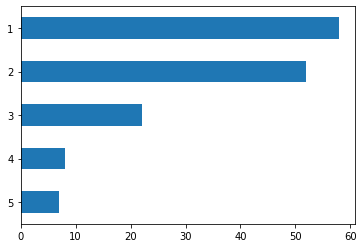

In [15]:
dfMeals01['GroundTruth'] = dfMeals01['Carb'].apply(lambda x: getBin(x))
dfMeals01

dfMeals01["GroundTruth"].value_counts().sort_values(ascending=True).plot(kind="barh")



In [18]:
dfMeals01['GroundTruth'].values[:5]
dfMeals01

,Datetime,Carb,Delete,Carb(Scaled),GroundTruth
0,2017-12-20 07:28:47,12.0,N,-0.918719,1
1,2017-12-20 11:41:22,32.0,N,0.012351,2
2,2017-12-20 22:23:10,25.0,N,-0.313523,2
3,2017-12-21 10:10:26,55.0,N,1.083081,3
4,2017-12-23 04:04:35,15.0,N,-0.779058,1
...,...,...,...,...,...
142,2018-02-11 16:27:04,40.0,N,0.384779,2
143,2018-02-11 18:14:37,8.0,N,-1.104932,1
144,2018-02-11 20:33:18,71.0,N,1.827936,4
145,2018-02-12 02:30:55,15.0,N,-0.779058,1


In [23]:
X = dfMeals01["Carb(Scaled)"].values.reshape(-1,1)
X
                              

array([[-0.91871851],
       [ 0.01235092],
       [-0.31352338],
       [ 1.08308076],
       [-0.77905809],
       [-0.73250462],
       [ 2.57279185],
       [-0.63939768],
       [-0.68595115],
       [-0.59284421],
       [ 0.43133216],
       [ 0.33822522],
       [-1.10493239],
       [-0.31352338],
       [-1.01182545],
       [-0.49973726],
       [-0.87216504],
       [ 0.38477869],
       [-1.01182545],
       [-0.26696991],
       [ 0.47788563],
       [-0.08075602],
       [ 1.68827589],
       [-1.19803934],
       [ 0.38477869],
       [-0.73250462],
       [ 2.4796849 ],
       [-0.59284421],
       [ 0.10545786],
       [ 0.38477869],
       [-0.31352338],
       [ 0.19856481],
       [-1.05837892],
       [ 0.38477869],
       [-0.17386296],
       [ 3.08488003],
       [-0.77905809],
       [ 0.33822522],
       [-0.54629074],
       [ 0.15201134],
       [-1.05837892],
       [-0.82561156],
       [-0.49973726],
       [ 0.61754605],
       [-0.87216504],
       [-1

In [32]:
import numpy as np  
def calculate_entropy(y_true, y_pred, base = 2):
    """
    """
    contingency_matrix = cluster.contingency_matrix(y_true, y_pred)
    base = e if base is None else base
    
    Entropy = []

    for i in range(0, len(contingency_matrix)):
        p = contingency_matrix[i,:]
        p = pd.Series(p).value_counts(normalize=True, sort=False)
        Entropy.append((-p/p.sum() * np.log(p/p.sum())/np.log(2)).sum())
    
    TotalP = sum(contingency_matrix,1);
    WholeEntropy = 0;

    for i in range(0, len(contingency_matrix)):
        p = contingency_matrix[i,:]
        WholeEntropy = WholeEntropy + ((sum(p))/(sum(TotalP)))*Entropy[i]
    
    return WholeEntropy
def calculate_purity_score(y_true, y_pred):
    """
    Purity is an external evaluation criterion of cluster quality. 
    It is the percent of the total number of objects(data points) that were classified correctly.
    """
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = cluster.contingency_matrix(y_true, y_pred)

    Purity = []

    for i in range(0, len(contingency_matrix)):
        p = contingency_matrix[i,:]
        Purity.append(p.max()/p.sum())

    TotalP = sum(contingency_matrix,1);
    WholePurity = 0;

    for i in range(0, len(contingency_matrix)):
        p = contingency_matrix[i,:]
        WholePurity = WholePurity + ((sum(p))/(sum(TotalP)))*Purity[i]
    
    return WholePurity

def calculate_v_measure_score(y_true, y_pred):
    """
    This metric is independent of the absolute values of the labels: 
    a permutation of the class or cluster label values won’t change the score value in any way.
    """
    return v_measure_score(y_true, y_pred)

In [33]:
# Machine learning models
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import cluster, silhouette_score, v_measure_score, adjusted_rand_score, completeness_score


kmeans = KMeans(n_clusters=7, random_state=42, max_iter=100)

# Fit a model
kmeans_model = kmeans.fit(X)

# The SSE value
print("The SSE value:\n"+ str(kmeans.inertia_))

# The number of iterations required to converge
print("\nThe number of iterations required to converge:\n"+str(kmeans.n_iter_))

# Compute the silhouette scores
kmeans_silhouette = silhouette_score(
    X, kmeans.labels_
).round(2)

print("\nSilhouette Score (A higher silhouette coefficient suggests better clusters):\n"+str(kmeans_silhouette))

The SSE value:
3.4075357915643645

The number of iterations required to converge:
6

Silhouette Score (A higher silhouette coefficient suggests better clusters):
0.56


In [35]:
# Create a column of K-means Prediction
dfMeals01['KmeanCluster'] = kmeans_model.predict(X)

# Calculate accuracy using entropy, purity_score, & v-measure score
kmean_entropy = calculate_entropy(dfMeals01['GroundTruth'],dfMeals01['KmeanCluster'])
kmean_purity_score = calculate_purity_score(dfMeals01['GroundTruth'],dfMeals01['KmeanCluster'])
kmean_v_measure_score = calculate_v_measure_score(dfMeals01['GroundTruth'], dfMeals01['KmeanCluster'])



In [38]:
# Define a model
dbscan = DBSCAN(eps=0.3)

# Fit a model
dbscan_model = dbscan.fit(X)

# Compute the silhouette scores
dbscan_silhouette = silhouette_score(
    X, dbscan_model.labels_
).round(2)

print("Silhouette Score (A higher silhouette coefficient suggests better clusters):\n"+str(dbscan_silhouette))

# Create a column of DBSCAN Prediction
dfMeals01['DBSCAN_Cluster'] = dbscan_model.fit_predict(X)


Silhouette Score (A higher silhouette coefficient suggests better clusters):
0.51


In [40]:
# Calculate accuracy using entropy, purity_score, & v-measure score
dbscan_entropy = calculate_entropy(dfMeals01['GroundTruth'],dfMeals01['DBSCAN_Cluster'])
dbscan_purity_score = calculate_purity_score(dfMeals01['GroundTruth'],dfMeals01['DBSCAN_Cluster'])
dbscan_v_measure_score = calculate_v_measure_score(dfMeals01['GroundTruth'], dfMeals01['DBSCAN_Cluster'])

In [42]:
from prettytable import PrettyTable

Model_Accuracy = PrettyTable()
Model_Accuracy.field_names = ["","SSE","V-Measure Score", "Entropy", "Purity Metrics"]
Model_Accuracy.align[""] = "r"
Model_Accuracy.add_row(["K-means (K=7)","%.2f"%kmeans.inertia_,"%.2f"%kmean_v_measure_score,"%.2f"%kmean_entropy,"%.2f"%kmean_purity_score])
Model_Accuracy.add_row(["DBSCAN","-","%.2f"%dbscan_v_measure_score,"%.2f"%dbscan_entropy,"%.2f"%dbscan_purity_score])
print("Accuracy report\n")
print(Model_Accuracy)

Accuracy report

+---------------+------+-----------------+---------+----------------+
|               | SSE  | V-Measure Score | Entropy | Purity Metrics |
+---------------+------+-----------------+---------+----------------+
| K-means (K=7) | 3.41 |       0.77      |   1.01  |      0.58      |
|        DBSCAN |  -   |       0.27      |   0.90  |      0.97      |
+---------------+------+-----------------+---------+----------------+


In [43]:
ldct_result = {}

ldct_result['SSE for Kmeans'] =  "%.2f"%kmeans.inertia_
ldct_result['SSE for DBSCAN'] =  "-"
ldct_result['Entropy for Kmeans'] =  "%.2f"%kmean_entropy
ldct_result['Entropy for DBSCAN'] =  "%.2f"%dbscan_entropy
ldct_result['Purity for K means'] =  "%.2f"%kmean_purity_score
ldct_result['Purity for DBSCAN'] =  "%.2f"%dbscan_purity_score

ldf_result = pd.DataFrame(ldct_result, index=[0])
ldf_result.to_csv('Result.csv',index=False)